In [1]:
import selenium
from selenium import webdriver
import numpy as np

import time

In [2]:
# 로또 당첨번호 내려받기

options = webdriver.ChromeOptions()
options.add_argument('--start-maximized')
driver = webdriver.Chrome('../chromedriver.exe', options = options)

driver.get('https://www.dhlottery.co.kr/gameResult.do?method=byWin')

time.sleep(1)
lotto_times = [driver.find_element_by_xpath('//*[@id="article"]/div[2]/div/div[2]/h4/strong').text]
lotto_time = lotto_times[0][:-1]
driver.find_element_by_xpath('//*[@id="drwNoStart"]/option[' + lotto_time + ']').click()
driver.find_element_by_xpath('//*[@id="drwNoEnd"]/option[1]').click()

driver.find_element_by_xpath('//*[@id="exelBtn"]').click()

time.sleep(3)
driver.close()

In [2]:
# 로또 번호별 통계 내려받아 정리하기
import pandas as pd

options = webdriver.ChromeOptions()
options.add_argument('--start-maximized')
driver = webdriver.Chrome('../chromedriver.exe', options = options)

driver.get('https://www.dhlottery.co.kr/gameResult.do?method=statByNumber')

prob_by_num = driver.find_element_by_xpath('//*[@id="printTarget"]/tbody').text

time.sleep(1)
driver.close()

tmp = [i.split() for i in prob_by_num.split('\n')]
tmp_1 = [tmp[i] + tmp[i+1] + tmp[i+2] for i in range(0, len(tmp), 3)]
prob_by_nums = pd.DataFrame(tmp_1)

prob_by_nums_dics ={}
for num in range(len(prob_by_nums)):
    prob_by_nums_dics[prob_by_nums.iloc[num,0]] = prob_by_nums.iloc[num,1][:-1]

prob_by_nums_dics

{'1': '94',
 '2': '91',
 '3': '87',
 '4': '92',
 '5': '84',
 '6': '85',
 '7': '87',
 '8': '83',
 '9': '72',
 '10': '90',
 '11': '86',
 '12': '92',
 '13': '94',
 '14': '89',
 '15': '84',
 '16': '87',
 '17': '93',
 '18': '90',
 '19': '84',
 '20': '90',
 '21': '87',
 '22': '71',
 '23': '77',
 '24': '88',
 '25': '81',
 '26': '89',
 '27': '95',
 '28': '78',
 '29': '75',
 '30': '83',
 '31': '88',
 '32': '77',
 '33': '93',
 '34': '95',
 '35': '84',
 '36': '85',
 '37': '89',
 '38': '88',
 '39': '91',
 '40': '89',
 '41': '77',
 '42': '84',
 '43': '100',
 '44': '84',
 '45': '85'}

In [6]:
# 로또 회수별 담청 번호 정리하기

import pandas as pd
from pandas import Series, DataFrame
import os

lotto = pd.read_excel('../downloads/lotto.xlsx') # 다운받은 파일 변경하여 xlsx로 저장 필요
del lotto['년도'], lotto['1등'], lotto['Unnamed: 4'], lotto['2등'], lotto['Unnamed: 6']
del lotto['3등'], lotto['Unnamed: 8'], lotto['4등'], lotto['Unnamed: 10'], lotto['5등'], lotto['Unnamed: 12']

lotto.columns = ['회차', '추첨일', 'No_1', 'No_2', 'No_3', 'No_4','No_5','No_6','bonus']
lotto = lotto.iloc[1:]
lotto['회차'] = lotto['회차'].astype('int64')
lotto

,회차,추첨일,No_1,No_2,No_3,No_4,No_5,No_6,bonus
1,993,2021.12.11,6,14,16,18,24,42,44
2,992,2021.12.04,12,20,26,33,44,45,24
3,991,2021.11.27,13,18,25,31,33,44,38
4,990,2021.11.20,2,4,25,26,36,37,28
5,989,2021.11.13,17,18,21,27,29,33,26
...,...,...,...,...,...,...,...,...,...
989,5,2003.01.04,16,24,29,40,41,42,3
990,4,2002.12.28,14,27,30,31,40,42,2
991,3,2002.12.21,11,16,19,21,27,31,30
992,2,2002.12.14,9,13,21,25,32,42,2


In [7]:
net_lotto_nums = []
lotto_nums = []
for i in range(len(lotto)):
    weight_num = (int(prob_by_nums_dics[str(lotto.iloc[i, 2])]) / 100) * \
                 (int(prob_by_nums_dics[str(lotto.iloc[i, 3])]) / 100) * \
                 (int(prob_by_nums_dics[str(lotto.iloc[i, 4])]) / 100) * \
                 (int(prob_by_nums_dics[str(lotto.iloc[i, 5])]) / 100) * \
                 (int(prob_by_nums_dics[str(lotto.iloc[i, 6])]) / 100) * \
                 (int(prob_by_nums_dics[str(lotto.iloc[i, 7])]) / 100)
    net_lotto_num = [lotto.iloc[i, 2], lotto.iloc[i, 3], lotto.iloc[i, 4], lotto.iloc[i, 5],
                 lotto.iloc[i, 6], lotto.iloc[i, 7]]
    lotto_num = [lotto.iloc[i, 2], lotto.iloc[i, 3], lotto.iloc[i, 4], lotto.iloc[i, 5],
                 lotto.iloc[i, 6], lotto.iloc[i, 7], weight_num]
    net_lotto_nums.append(net_lotto_num)
    lotto_nums.append(lotto_num)
lotto_nums

[[6, 14, 16, 18, 24, 42, 0.43785735839999995],
 [12, 20, 26, 33, 44, 45, 0.48932961839999994],
 [13, 18, 25, 31, 33, 44, 0.47108609856],
 [2, 4, 25, 26, 36, 37, 0.45657610362],
 [17, 18, 21, 27, 29, 33, 0.4825168987500001],
 [2, 13, 20, 30, 31, 41, 0.43297542288],
 [2, 4, 15, 23, 29, 38, 0.3573906336],
 [7, 10, 16, 28, 41, 42, 0.34367316984],
 [17, 21, 23, 30, 34, 44, 0.41264245638],
 [3, 10, 23, 35, 36, 37, 0.3831251886],
 [13, 23, 26, 31, 35, 43, 0.47617933440000004],
 [5, 7, 13, 20, 21, 44, 0.45182206944],
 [27, 36, 37, 41, 43, 45, 0.47037278749999994],
 [3, 13, 16, 23, 24, 35, 0.404966447424],
 [7, 11, 16, 21, 27, 33, 0.5003371644299999],
 [1, 7, 15, 32, 34, 42, 0.42210452592],
 [2, 9, 10, 14, 22, 44, 0.31299978528],
 [4, 12, 14, 25, 35, 37, 0.45616291257600006],
 [7, 8, 9, 17, 22, 24, 0.302102146368],
 [1, 2, 11, 16, 39, 44, 0.48922385803199997],
 [22, 26, 31, 37, 41, 42, 0.320103958944],
 [3, 6, 17, 23, 37, 39, 0.428887363905],
 [2, 6, 17, 18, 21, 26, 0.50129691885],
 [9, 11, 16,

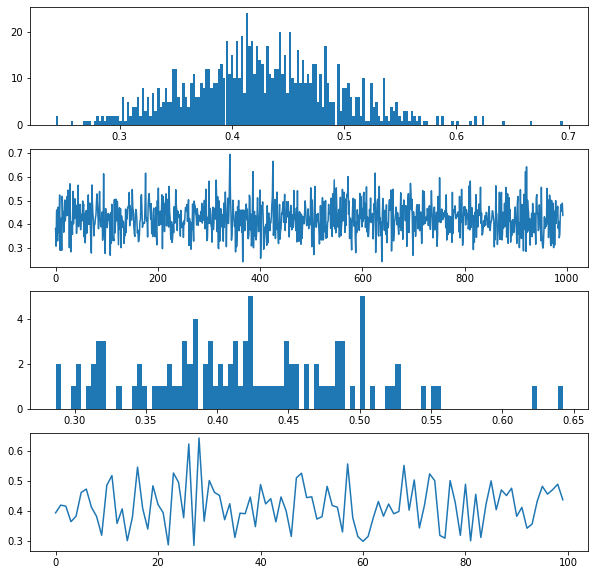

-0.05147225999999999


In [8]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

%matplotlib inline

probs = []

for i in range(len(lotto_nums)):
    probs.append(lotto_nums[i][6])

prob_array1 = np.array(list(reversed(probs)))
prob_array2 = np.array(list(reversed(probs[0:100])))

# print(list(reversed(probs[0:20])))

plt.figure(figsize = (10, 10))
plt.subplot(4, 1, 1)
plt.hist(prob_array1, 200)

plt.subplot(4, 1, 2)
plt.plot(prob_array1)

plt.subplot(4, 1, 3)
plt.hist(prob_array2, 100)

plt.subplot(4, 1, 4)
plt.plot(prob_array2)
 
plt.show()

last_diff = lotto_nums[0][6] - lotto_nums[1][6]
print(last_diff)

-0.05147225999999999
5.542536456653172e-05 0.09538316047720212


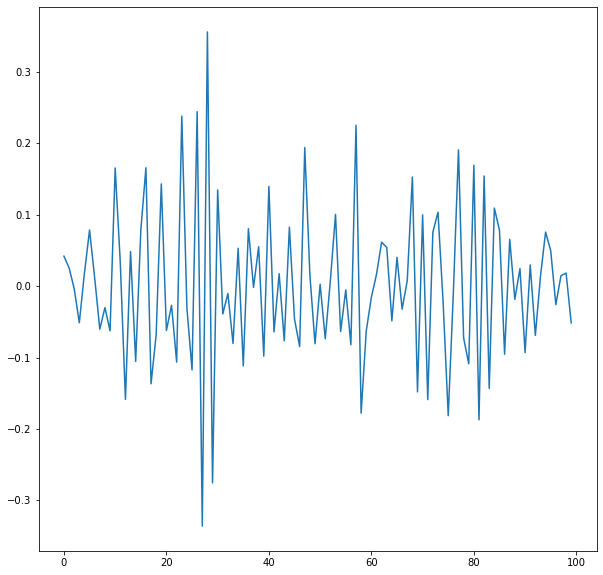

In [9]:
prob_diff = []

for i in range(len(lotto_nums) - 2, -1, -1):
    each_diff = lotto_nums[i][6] - lotto_nums[i + 1][6]
    prob_diff.append(each_diff)

# print(prob_diff[len(lotto_nums) - 101:len(lotto_nums)])
print(prob_diff[-1])
prob_diff_array1 = np.array(list(prob_diff))
prob_diff_array2 = np.array(list(prob_diff[len(lotto_nums) - 101:len(lotto_nums)]))
x1 = np.array([i for i in range(len(lotto_nums)-1)])
x2 = np.array([i for i in range(0, 100)])

# print(prob_diff_array2)
# print(prob_diff_array1.size, prob_diff_array2.size)
# print(x1.size, x2.size)
prob_mean = np.mean(prob_diff_array1)
prob_std = np.std(prob_diff_array1)
print(prob_mean, prob_std)

# plt.figure(figsize = (15, 10))
# plt.subplot(2,2,1)
# plt.plot(prob_diff_array1)
plt.figure(figsize = (10, 10))
# plt.subplot(2,2,2)
plt.plot(prob_diff_array2)

# plt.subplot(2,2,3)
# plt.scatter(x1, prob_diff_array1)

# plt.subplot(2,2,4)
# plt.scatter(x2, prob_diff_array2)

In [10]:
# 기존 당첨번호 중복 여부 확인
same_lotto = []

for x in net_lotto_nums:
    net_lotto_copy = net_lotto_nums.copy()
    net_lotto_copy.remove(x)
    if x in net_lotto_copy:
        same_lotto.append(x)
        
if len(same_lotto) > 0:
    print(same_lotto)
else:
    print('기존 당첨번호 중 중복 당첨번호가 없습니다.')


기존 당첨번호 중 중복 당첨번호가 없습니다.


In [16]:
# 로또 번호 발행 규칙
# 1. 난수 6자리 1개 반복 생성
# 2. 기존 당첨번호 중복번호 제거
# 3. 기존 당첨 번호 확률 참조하여 숫자별 확률 가중치 적용한 곱을 기준으로 
import random
x, y = 0, 0
lotto_samples = []
weighted_samples = []

# temp = []
# for i in range(len(lotto_nums) - 2, -1, -1):
#     if lotto_nums[i][6] >= lotto_nums[0][6] - 0.02 and lotto_nums[i][6] <= lotto_nums[0][6] + 0.02:
#         temp.append(abs(lotto_nums[i][6] - lotto_nums[i + 1][6]))
# temp = np.array(temp)
# temp_mean = np.mean(temp)
# temp_max = np.max(temp)

# last_diff = lotto_nums[0][6] - lotto_nums[1][6]

while True:
    lotto_sort = []
    sample_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                   11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
                   21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
                   31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
                   41, 42, 43, 44, 45]
    last_lotto = lotto_nums[0].copy()
    last_lotto.remove(last_lotto[6])
    for j in last_lotto:
        sample_list.remove(j)

#     last_lotto = lotto_nums[1].copy()
#     last_lotto.remove(last_lotto[6])
#     for j in last_lotto:
#         if j in sample_list:
#             sample_list.remove(j)
            
    lotto_number = random.sample(sample_list, k=6)
    lotto_sort = sorted(lotto_number)
    
    if lotto_sort in net_lotto_nums:
        continue
    elif lotto_sort in lotto_samples:
        continue
    else:
        prob_num = (int(prob_by_nums_dics[str(lotto_sort[0])]) / 100) * \
                   (int(prob_by_nums_dics[str(lotto_sort[1])]) / 100) * \
                   (int(prob_by_nums_dics[str(lotto_sort[2])]) / 100) * \
                   (int(prob_by_nums_dics[str(lotto_sort[3])]) / 100) * \
                   (int(prob_by_nums_dics[str(lotto_sort[4])]) / 100) * \
                   (int(prob_by_nums_dics[str(lotto_sort[5])]) / 100)
        go_no = 0
        if x < 10:
            if prob_num > 0.34 and prob_num <= 0.38:
                for lst in lotto_samples:
                    if len(list(set(lotto_sort) & set(lst))) > 2:
                        go_no = 1
                        break
                if go_no == 0:
                    lotto_samples.append(lotto_sort)
                    lotto_sort.append(prob_num)
                    weighted_samples.append(lotto_sort)
                    x += 1
        if y < 10:
            if prob_num > 0.44 and prob_num <= 0.48:
                for lst in lotto_samples:
                    if len(list(set(lotto_sort) & set(lst))) > 4:
                        go_no = 1
                        break
                if go_no == 0:
                    lotto_samples.append(lotto_sort)
                    lotto_sort.append(prob_num)
                    weighted_samples.append(lotto_sort)
                    y += 1
        if (x + y) >= 20:
            break

#     if lotto_sort in lotto_nums:
#         break
#     elif lotto_sort in lotto_samples:
#         break
#     else:
#         prob_num = (int(prob_by_nums_dics[str(lotto_sort[0])]) / 100) * \
#                    (int(prob_by_nums_dics[str(lotto_sort[1])]) / 100) * \
#                    (int(prob_by_nums_dics[str(lotto_sort[2])]) / 100) * \
#                    (int(prob_by_nums_dics[str(lotto_sort[3])]) / 100) * \
#                    (int(prob_by_nums_dics[str(lotto_sort[4])]) / 100) * \
#                    (int(prob_by_nums_dics[str(lotto_sort[5])]) / 100)

#         if last_diff > -0.05 and last_diff < 0.05:
#             if prob_num >= (lotto_nums[0][6] - temp_mean) and prob_num <= (lotto_nums[0][6] + temp_mean):
#                 lotto_sort.append(prob_num)
#                 lotto_samples.append(lotto_sort)
#                 x += 1
#         else:
#             if last_diff > 0:
#                 if prob_num >= (lotto_nums[0][6] - temp_max) and prob_num <= (lotto_nums[0][6] - temp_mean / 2):
#                     lotto_sort.append(prob_num)
#                     lotto_samples.append(lotto_sort)
#                     x += 1
#             else:
#                 if prob_num >= (lotto_nums[0][6] + temp_mean / 2) and prob_num <= (lotto_nums[0][6] + temp_max):
#                     lotto_sort.append(prob_num)
#                     lotto_samples.append(lotto_sort)
#                     x += 1
# x = 0
# while x < 10:
#     lotto_sort = []
#     last_lotto = lotto_nums[1].copy()
#     last_lotto.remove(last_lotto[6])
#     for j in last_lotto:
#         if j in sample_list:
#             sample_list.remove(j)
#     lotto_number = random.sample(sample_list, k=6)
#     lotto_sort = sorted(lotto_number[:6])

#     if lotto_sort in lotto_nums:
#         break
#     elif lotto_sort in lotto_samples:
#         break
#     else:
#         prob_num = (int(prob_by_nums_dics[str(lotto_sort[0])]) / 100) * \
#                    (int(prob_by_nums_dics[str(lotto_sort[1])]) / 100) * \
#                    (int(prob_by_nums_dics[str(lotto_sort[2])]) / 100) * \
#                    (int(prob_by_nums_dics[str(lotto_sort[3])]) / 100) * \
#                    (int(prob_by_nums_dics[str(lotto_sort[4])]) / 100) * \
#                    (int(prob_by_nums_dics[str(lotto_sort[5])]) / 100)

#         if last_diff > -0.05 and last_diff < 0.05:
#             if prob_num >= (lotto_nums[0][6] - temp_max) and prob_num <= (lotto_nums[0][6] + temp_max):
#                 lotto_sort.append(prob_num)
#                 lotto_samples.append(lotto_sort)
#                 x += 1
#         else:
#             if last_diff > 0:
#                 if prob_num >= (lotto_nums[0][6] - temp_max) and prob_num <= (lotto_nums[0][6] - temp_mean / 2):
#                     lotto_sort.append(prob_num)
#                     lotto_samples.append(lotto_sort)
#                     x += 1
#             else:
#                 if prob_num >= (lotto_nums[0][6] + temp_mean / 2) and prob_num <= (lotto_nums[0][6] + temp_max):
#                     lotto_sort.append(prob_num)
#                     lotto_samples.append(lotto_sort)
#                     x += 1
            
weighted_samples

[[4, 12, 25, 37, 40, 45, 0.4615934234400001],
 [9, 12, 23, 28, 33, 43, 0.36998881920000004],
 [10, 12, 29, 34, 36, 39, 0.45632632500000003],
 [2, 3, 35, 37, 40, 44, 0.44248569019200007],
 [12, 19, 30, 32, 33, 43, 0.4593237264000001],
 [1, 17, 21, 23, 39, 45, 0.45298215963000005],
 [2, 3, 12, 25, 28, 41, 0.35433888890400006],
 [5, 12, 21, 33, 40, 44, 0.46745370604799996],
 [8, 10, 15, 17, 19, 22, 0.34803303695999993],
 [15, 22, 33, 34, 43, 44, 0.4426122959999999],
 [8, 19, 21, 25, 30, 35, 0.342546100848],
 [10, 13, 20, 28, 29, 41, 0.34297263],
 [5, 7, 28, 33, 36, 43, 0.450603972],
 [1, 4, 20, 21, 22, 32, 0.37019156328],
 [19, 34, 35, 37, 38, 40, 0.46724521535999997],
 [2, 8, 20, 30, 33, 39, 0.47749016132999994],
 [1, 5, 9, 20, 25, 36, 0.3522784607999999],
 [7, 8, 12, 25, 29, 33, 0.3753309717000001],
 [11, 17, 22, 26, 44, 45, 0.36085104467999995],
 [8, 27, 28, 29, 31, 38, 0.357209424]]

In [17]:
lotto_final = pd.DataFrame(weighted_samples, columns = ['번호1', '번호2', '번호3', '번호4', '번호5', '번호6', '확률'])
lotto_final1 = lotto_final.sort_values(by = ['확률'], ascending = False)

import xlwings as xw
xw.view(lotto_final1)